In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np 


In [2]:
## Carregar dados
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

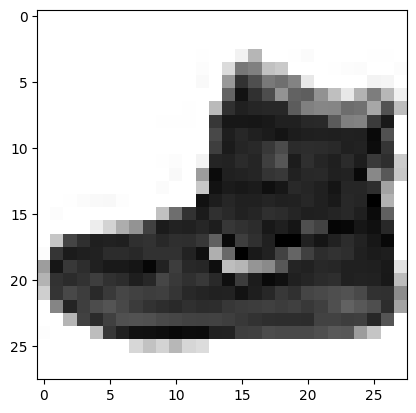

Label: 9


In [6]:
## Visualizando imagens

imagem = x_train[0]
classe_da_imagem = y_train[0]
plt.imshow(imagem.reshape(28,28), cmap=plt.cm.binary)
plt.show()
print('Label: {}'.format(classe_da_imagem))

In [7]:
## Normaliza para melhorar o treinamento
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

In [8]:
## Inclui canal de cor
x_train = x_train.reshape(-1, 28, 28, 1)
x_test  = x_test.reshape(-1, 28, 28, 1)

In [11]:

## Reclassificação: Frio (0) e Calor (1)
frio = [2,3,4,6,9]      # Pullover, Dress, Coat, Shirt, Ankle boot
calor = [0,1,5,7,8]     # T-shirt, Trouser, Sandal, Sneaker, Bag

y_train_bin = np.array([0 if c in frio else 1 for c in y_train])
y_test_bin  = np.array([0 if c in frio else 1 for c in y_test])

print("Classes únicas após transformação:", np.unique(y_train_bin))

Classes únicas após transformação: [0 1]


In [12]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # saída binária
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train_bin, epochs=10,
                    validation_data=(x_test, y_test_bin))


/workspaces/Estudando-IA/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-22 18:08:02.668450: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/10


2025-08-22 18:08:02.898050: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8984 - loss: 0.2334

2025-08-22 18:08:32.630363: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.8984 - loss: 0.2334 - val_accuracy: 0.9438 - val_loss: 0.1396
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 15ms/step - accuracy: 0.9472 - loss: 0.1273 - val_accuracy: 0.9496 - val_loss: 0.1252
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.9549 - loss: 0.1086 - val_accuracy: 0.9506 - val_loss: 0.1237
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.9606 - loss: 0.0946 - val_accuracy: 0.9561 - val_loss: 0.1086
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9649 - loss: 0.0850 - val_accuracy: 0.9572 - val_loss: 0.1091
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9688 - loss: 0.0753 - val_accuracy: 0.9586 - val_loss: 0.1019
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9722 - loss: 0.0684 - val_accuracy: 0.9576 - val_loss: 0.1113
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.9760 - loss: 0.05

313/313 - 2s - 5ms/step - accuracy: 0.9613 - loss: 0.1178

Acurácia no conjunto de teste: 96.13%


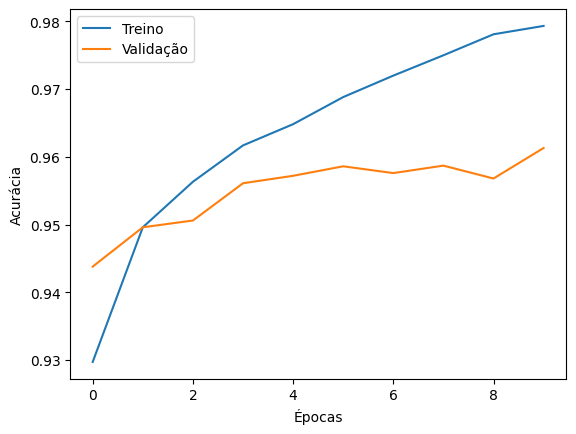

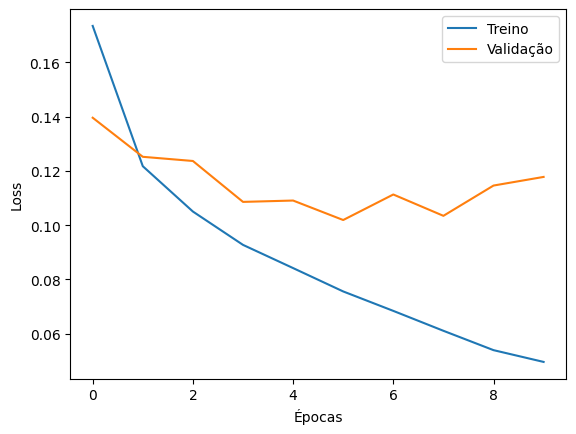

In [13]:
# Avaliar o modelo nos dados de teste
test_loss, test_acc = model.evaluate(x_test, y_test_bin, verbose=2)
print("\nAcurácia no conjunto de teste: {:.2f}%".format(test_acc * 100))

# Plotar a curva de acurácia durante o treino
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.legend()
plt.show()

# Plotar a curva de perda (loss) durante o treino
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.xlabel("Épocas")
plt.ylabel("Loss")
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


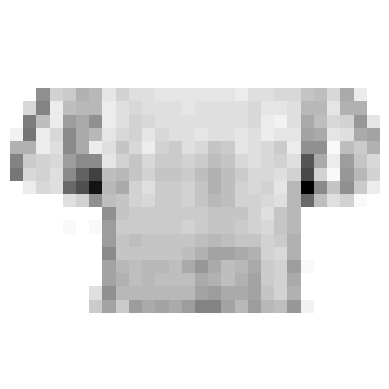

Índice da imagem: 9227
Classe real: 0 (0=Frio, 1=Calor)
Classe predita pelo modelo: 0 (0=Frio, 1=Calor)


In [14]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Escolhe uma imagem aleatória do conjunto de teste
idx = random.randint(0, len(x_test)-1)

imagem = x_test[idx]
classe_real = y_test_bin[idx]

# Faz a predição
pred = model.predict(imagem.reshape(1,28,28,1))
classe_predita = 1 if pred[0][0] > 0.5 else 0

# Mostrar imagem
plt.imshow(imagem.reshape(28,28), cmap=plt.cm.binary)
plt.axis('off')
plt.show()

# Mostrar rótulos
print(f"Índice da imagem: {idx}")
print(f"Classe real: {classe_real} (0=Frio, 1=Calor)")
print(f"Classe predita pelo modelo: {classe_predita} (0=Frio, 1=Calor)")
